# Handwritten Character recogniction using a CNN Model

## Frameworks and libraries used, and why ? 
For this part, we will use the following frameworks and libraries: 

- **sklearn**, for splitting datasets between training and testing sub datasets
- **numpy**, to perform operations on arrays and matrices
- **tensorflow**, for importing the MNIST dataset as well as the realization of machine learning and deep learning algorithms
- **matplotlib**, for displaying the dataset images
- **random**, for the generation of random numbers
- **opencv2**, for the processing of the dataset test images

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.datasets import mnist
import random
import matplotlib.pyplot as plt

## Dataset manipulation
We use a different dataset. We do the same manipulation as in the first part, except that we get our datasets directly from 2 .csv files obtained from the Kaggle website. We then apply some small mathematical operations so that our model fits these data 

In [7]:
train = pd.read_csv('../datasets/emnist-balanced-train.csv')
test = pd.read_csv('../datasets/emnist-balanced-test.csv')

We extract all the label of this datasets.

In [9]:
columns = ['labels']
for i in range(train.shape[1]-1):
    columns.append(i)
    
train.columns = columns
test.columns = columns

classes = train['labels'].unique()
print('number of classes: ', len(classes))

number of classes:  47


In [10]:
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

We split our dataset it in two sub datasets. That will permit to evaluate the performance of our model: 

- A first part, randomly split, used to train our model, containing 60,000 images
- a second part, used for the validation and testing of our model, once trained, containing 10000 images

Then, we apply a rotation of 90° to the left and a resize to the (28,28) shape

In [11]:
x_train, x_val, y_train, y_val = train_test_split(train.drop(['labels'], axis=1),
                                                  train.labels,
                                                  train_size=0.8,
                                                  test_size=0.2,
                                                  random_state=42)

x_train = np.apply_along_axis(reshape_and_rotate, 1, x_train)
x_val = np.apply_along_axis(reshape_and_rotate, 1, x_val)

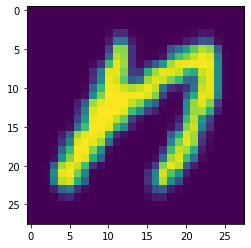

In [12]:
plt.imshow(x_train[3])

Then, we normalize our data by dividing each pixel, in gray level, by 255. 
Finally, we make sure that each image has a dimension of 28x28

In [11]:
x_train = x_train/255.0
x_val = x_val/255.0

Finally, we reshape the dataset : 

In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

input_shape = x_train[0].shape

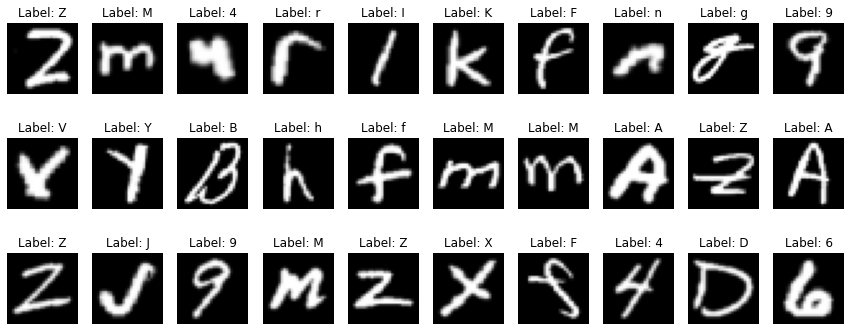

In [13]:
test_samples = random.sample(range(0, len(x_train)), 30) 
pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A' ,'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']

plt.figure(figsize=(15, 6))
for i in test_samples:
    plt.subplot(3, 10, test_samples.index(i) + 1)  
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {pred[y_train.iloc[i]]}')
    plt.axis('off')

## CNN Model creation
### Algorithm choice 
There is a large number of models using several types of machine learning or deep learning algorithms. We have several examples of handwritten digit recognition using the SVM algorithm. 

SVM, acronym of Support Vector Machine, is a machine learning algorithm used for classification problems. It belongs to the supervised type of algorithms. Its goal, from a series of inputs, is to find a boundary between several outputs, in order to make either qualitative or quantitative predictions.

This algorithm has the virtue of being extremely simple and having many examples on the internet. We have chosen to make the task more complex, but to have more convincing results, by using a deep learning model, by implementing a CNN. 

Convolutional neural networks (CNNs) is a neural network deep learning algorithm utilized for classification and computer vision tasks. CNN uses what we call filters, which allow to realize the pattern detection. CNN do a convolution product with filters to identify patterns and features in an image. 

Convolutional neural networks have revolutionised image classification and object recognition tasks, using the principles of linear algebra, in particular the convolution product, to identify patterns and features in an image. This will be very useful, for our handwritten digits recognition.

### Algorithm implementation
For the implementation, we will use the Keras library from Tensorflow. We are going to use more particularly the Sequencial functions corresponding to the use of an ANN type model, as well as the Conv2D() functions for the realization of the convolution products, characteristic of a CNN Algorithm, as well as the MaxPool2d() functions, allowing to resample the data, Dropout(), allowing to prevent the overfitting, Flatten(), allowing to flatten the data, and Dense() allowing to define a new layer connected to the neural network 

There is our CNN model used for this case. We have found this model by trial and error :

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(47,activation='softmax'))

There is on schema witch explained who it works ? 

![CNN for digit recognition - https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53](../docs/assets/img4.png)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

We compile this model : 

In [37]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'], )

## Model training
Once this model is defined and compiled, we fit it with our training data, over 30 periods, in order to have an accuracy approaching 87%. This takes about 30 minutes.

In [38]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
2820/2820 [==============================] - 114s 40ms/step - loss: 1.1214 - accuracy: 0.6660 - val_loss: 0.4716 - val_accuracy: 0.8377
Epoch 2/10
2820/2820 [==============================] - 117s 41ms/step - loss: 0.6765 - accuracy: 0.7816 - val_loss: 0.4097 - val_accuracy: 0.8524
Epoch 3/10
2820/2820 [==============================] - 107s 38ms/step - loss: 0.5909 - accuracy: 0.8035 - val_loss: 0.3821 - val_accuracy: 0.8566
Epoch 4/10
2820/2820 [==============================] - 109s 39ms/step - loss: 0.5383 - accuracy: 0.8190 - val_loss: 0.3774 - val_accuracy: 0.8626
Epoch 5/10
2820/2820 [==============================] - 110s 39ms/step - loss: 0.5023 - accuracy: 0.8297 - val_loss: 0.3657 - val_accuracy: 0.8677
Epoch 6/10
2820/2820 [==============================] - 110s 39ms/step - loss: 0.4720 - accuracy: 0.8373 - val_loss: 0.3584 - val_accuracy: 0.8719
Epoch 7/10
2820/2820 [==============================] - 110s 39ms/step - loss: 0.4531 - accuracy: 0.8424 - val_loss: 0

## Model testing
Then, we test our model with the test sub dataset. We evaluate the model by using the evaluate function.

In [39]:
model.evaluate(x_val, y_val)

705/705 [==============================] - 4s 5ms/step - loss: 0.3577 - accuracy: 0.8721


[0.3577237129211426, 0.8720744848251343]

We note that we have less satisfactory results than for the digits. This is probably due to the number of label classes which goes from 10 to 47 classes.

We save this model to the .h5 format.

In [40]:
model.save("models/EMNIST.h5")

In [18]:
from tensorflow import keras
model = keras.models.load_model('models/EMNIST.h5')

We will try to predict all values of the testing subdataset.

In [19]:
predictions = model.predict(x_val)

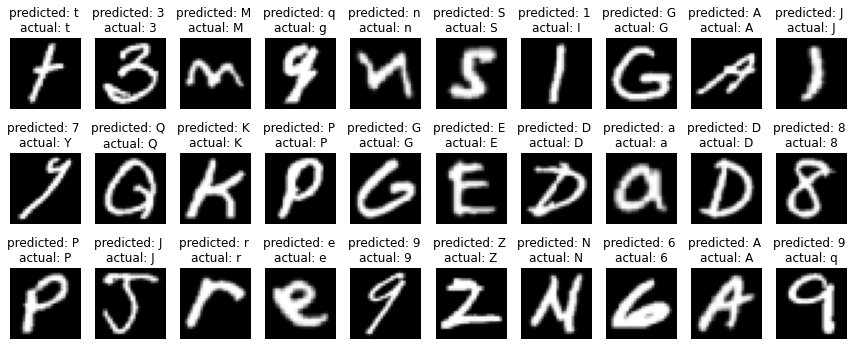

In [21]:
import random

pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A' ,'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']
test_samples = random.sample(range(0, len(x_val)), 30) 

plt.figure(figsize=(15, 6))
for i in test_samples:
    plt.subplot(3, 10, test_samples.index(i) + 1)  
    plt.imshow(x_val[i], cmap='gray')
    plt.title(f'predicted: {pred[np.argmax(predictions[i])]} \nactual: {pred[y_val.iloc[i]]}')
    plt.axis('off')

Finally, we test our model by using our own digit image generated by us. We pre-process it by using some opencv function.

Character recognized : G


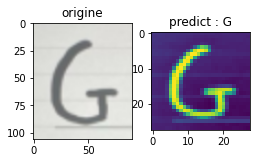

In [23]:
import cv2
from tensorflow.keras.preprocessing import image

img = cv2.imread("images/G.png")
plt.subplot(1, 3, 1)
plt.title("origine")
plt.imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img =  255.0 - img
img = cv2.GaussianBlur(img, (5, 5), 0)
img = cv2.resize(img, (28, 28))

img_6 = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
img_6 = image.img_to_array(img_6)
img_6.reshape(28, 28)
img_6 = np.expand_dims(img_6, axis=0)


pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']

pre = np.argmax(model.predict(img_6))
prediction = (model.predict(img_6) > 0.5).astype("int32")
print("Character recognized :", pred[pre])

plt.subplot(1, 3, 2) 
plt.title("predict : " + pred[pre]) 
plt.imshow(img)
